APPLIED DATA SCIENCE ASSIGNMENT - 3

ALEKYA RAMANI 20BPS1097

In [2]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('Housing.csv')


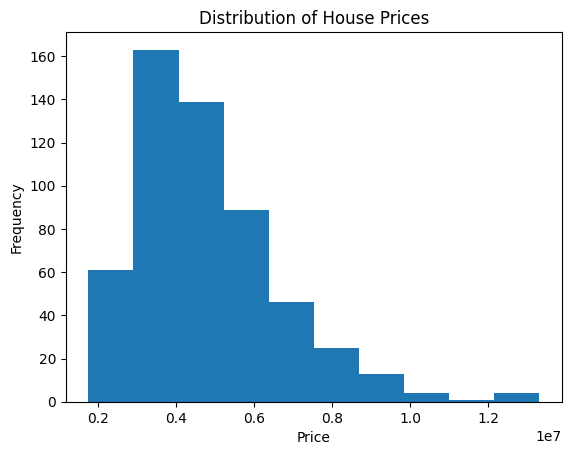

In [3]:
import matplotlib.pyplot as plt

# Univariate Analysis
plt.hist(dataset['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


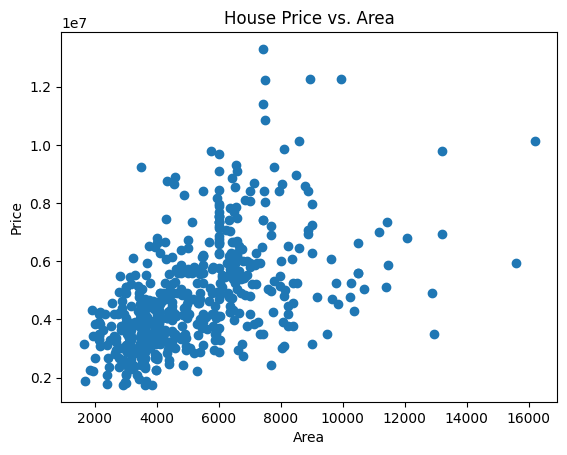

In [4]:
# Bi-Variate Analysis
plt.scatter(dataset['area'], dataset['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price vs. Area')
plt.show()


<ipython-input-5-a53a17f9eba6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


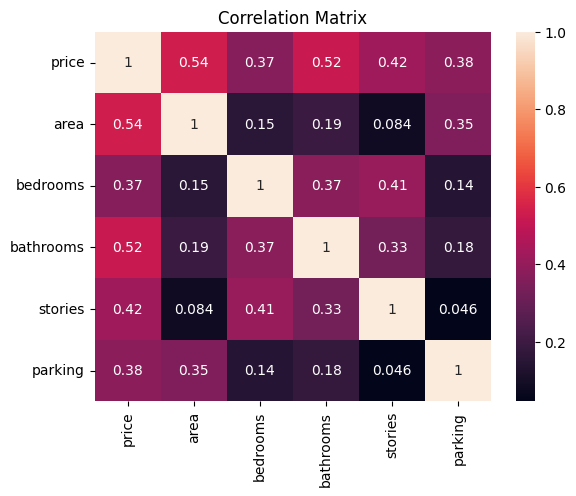

In [5]:
import seaborn as sns

# Multi-Variate Analysis (Correlation Matrix)
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Descriptive Statistics
stats = dataset.describe()
print(stats)


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [7]:
# Check for Missing Values
missing_values = dataset.isnull().sum()
print(missing_values)

# Deal with Missing Values (e.g., fill with mean value)
dataset['price'].fillna(dataset['price'].mean(), inplace=True)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


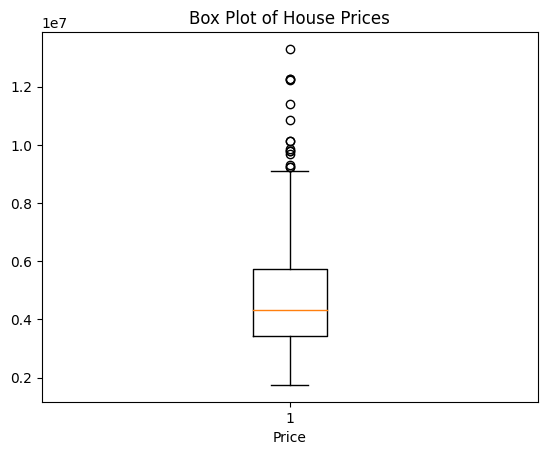

In [9]:
# Find Outliers (e.g., using box plot)
plt.boxplot(dataset['price'])
plt.xlabel('Price')
plt.title('Box Plot of House Prices')
plt.show()

# Replace Outliers (e.g., with median value)
median_price = dataset['price'].median()
dataset.loc[dataset['price'] > 1.5 * median_price, 'Price'] = median_price


In [24]:
# Check for Categorical Columns
categorical_cols = ['furnishingstatus']

# Perform Encoding (One-Hot Encoding)
dataset_encoded = pd.get_dummies(dataset, columns=categorical_cols)


In [25]:
# Split into Dependent and Independent Variables
X = dataset_encoded.drop('price', axis=1)
y = dataset_encoded['price']


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Perform Encoding (One-Hot Encoding)
encoder = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = encoder.fit_transform(X)

# Scale the Independent Variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


ValueError: ignored

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Test the Model
y_pred = model.predict(X_test)

# Measure the Performance using Metrics
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


NameError: ignored